<a href="https://colab.research.google.com/github/Yashi95488/ProjectsDS/blob/main/Sentiment_Analysis_on_Social_Media_Data(Level_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import nltk

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [6]:
#Load DATASET
df='/content/drive/MyDrive/sentimentdataset.csv'
tweets_df=pd.read_csv(df)

In [7]:
#Display a few rows of data
tweets_df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [8]:
#Drop Unnamed
tweets_df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
tweets_df.head()

,Unnamed: 0.1,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [10]:
#Data Cleaning
#Clean ' Text ' column for sentiment analysis
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text=re.sub(r'[^\w\s]','',text)
    text=re.sub(r'[^A-Za-z\s]','',text)
    text=text.lower()
    return text

In [11]:
tweets_df['Cleaned_Text']=tweets_df['Text'].apply(clean_text)
tweets_df['Cleaned_Text'].head()

,Cleaned_Text
0,enjoying a beautiful day at the park ...
1,traffic was terrible this morning ...
2,just finished an amazing workout
3,excited about the upcoming weekend getaway ...
4,trying out a new recipe for dinner tonight ...


In [12]:
#Sentiment Analysis
#Initialize VADER sentiment analyzer
s = SentimentIntensityAnalyzer()

In [13]:
def get_vader_sentiment(text):
  score = s.polarity_scores(text)
  if score['compound'] >= 0.05:
    return 'Positive'
  elif score['compound'] <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

In [14]:
#Apply VADER sentiment analysis to the cleaned text
tweets_df['Sentiment'] = tweets_df['Cleaned_Text'].apply(get_vader_sentiment)

In [15]:
#Hashtag Analysis
#Extract Hashtags
tweets_df['Hashtags'] = tweets_df['Text'].str.findall(r'#\w+')

#Flatten the list of hashtags and create a data frame
hash = tweets_df.explode('Hashtags')

#Count occurrences of each hashtag by sentiment
hash_count = hash.groupby([ 'Hashtags','Sentiment']).size().unstack(fill_value=0)

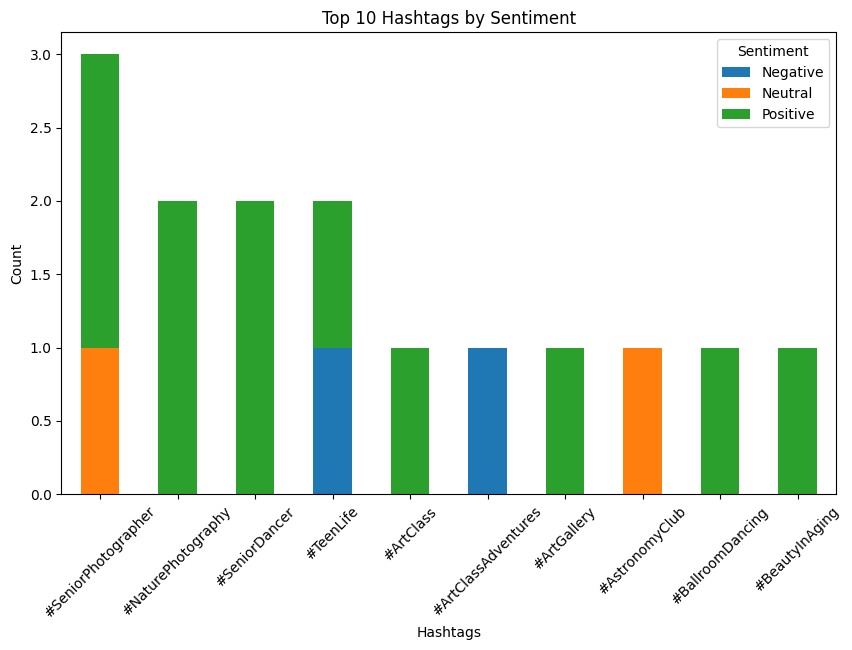

In [16]:
#Plot top 10 hashtags by sentiment
top_hash=hash_count.sum(axis=1).nlargest(10).index
hash_count.loc[top_hash].plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Top 10 Hashtags by Sentiment')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

In [17]:
#Generate word clouds for positive and negative sentiments
positive = ' '.join(tweets_df[tweets_df['Sentiment'] == 'Positive']['Cleaned_Text'])
negative = ' '.join(tweets_df[tweets_df['Sentiment'] == 'Negative']['Cleaned_Text'])

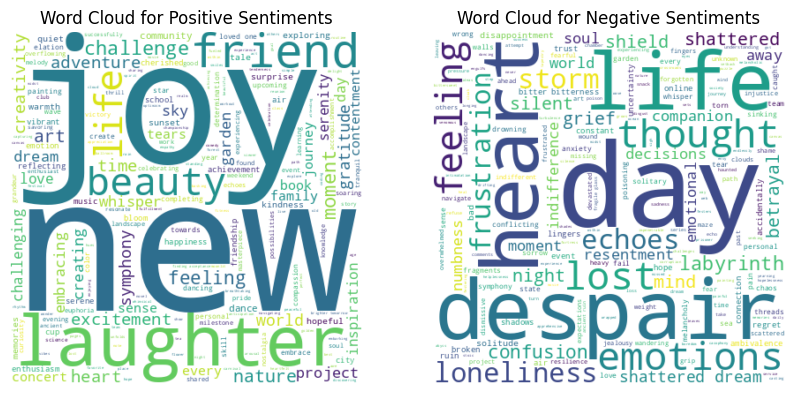

In [18]:
#Create word clouds
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
worldcloud_pos = WordCloud(width=400, height=400, background_color='white').generate(positive)
plt.imshow(worldcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')

plt.subplot(1,2,2)
wordcloud_neg = WordCloud(width=400, height=400, background_color='white').generate(negative)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments')

plt.show()

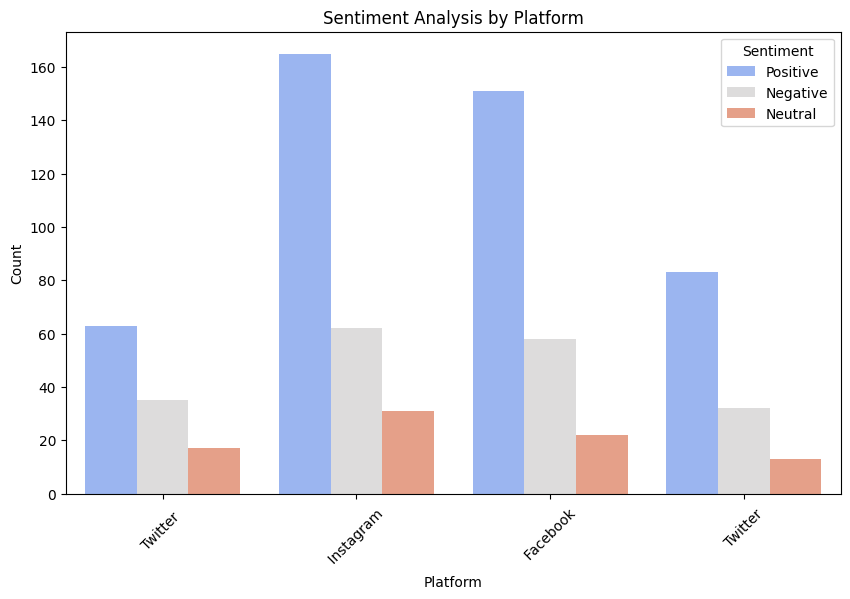

In [19]:
#Analyze sentiment by platform
plt.figure(figsize=(10,6))
sns.countplot(x='Platform',hue='Sentiment',data=tweets_df,palette='coolwarm')
plt.title('Sentiment Analysis by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

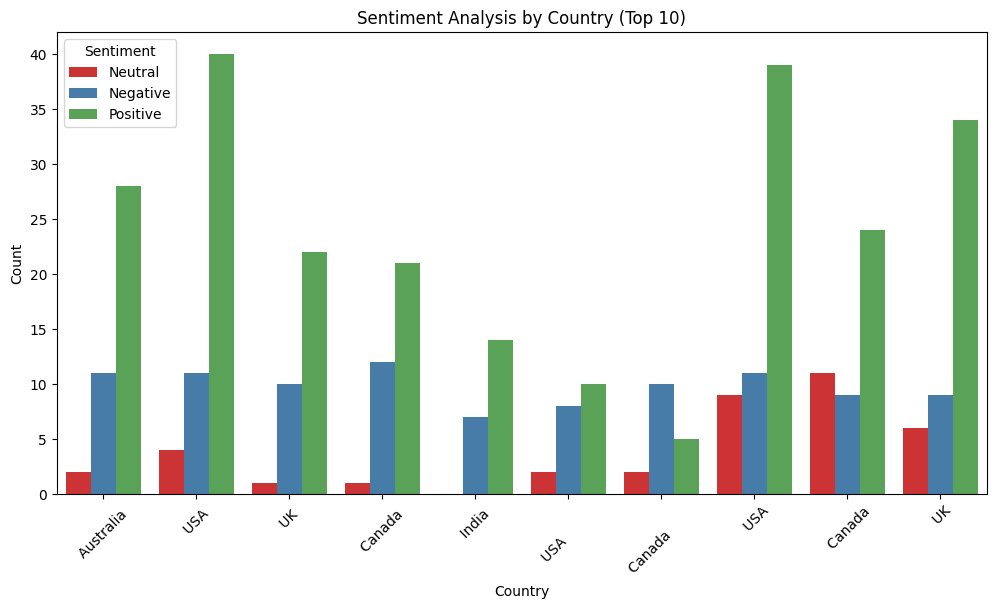

In [20]:
#Analyze sentiment by country
plt.figure(figsize=(12,6))
country_sentiment = tweets_df['Country'].value_counts().head(10)
sns.countplot(data=tweets_df[tweets_df['Country'].isin(country_sentiment.index)],x='Country',hue='Sentiment',palette='Set1')
plt.title('Sentiment Analysis by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

In [21]:
#Analyze sentiment over time
#Create new column for Year-Month
tweets_df['Year_Month'] = tweets_df['Year'].astype(str) + '-' + tweets_df['Month'].astype(str)


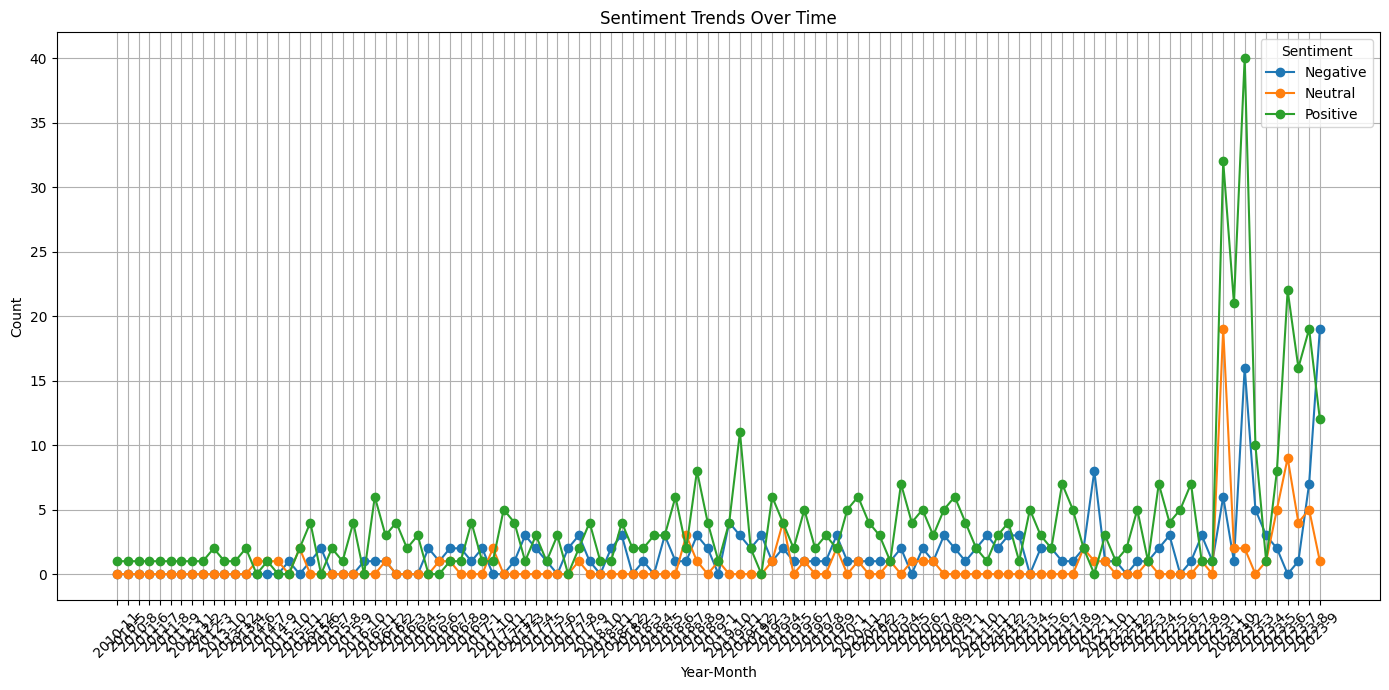

In [22]:
#Group by Year-Month and Sentiment , then count occurences
monthly_sent=tweets_df.groupby(['Year_Month','Sentiment']).size().unstack(fill_value=0)

#Plotting the sentiment trends over time using a line plot
plt.figure(figsize=(14,7))
for sentiment in monthly_sent.columns:
  plt.plot(monthly_sent.index,monthly_sent[sentiment],marker='o', label=sentiment)
plt.title('Sentiment Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.grid()
plt.tight_layout()
plt.show()

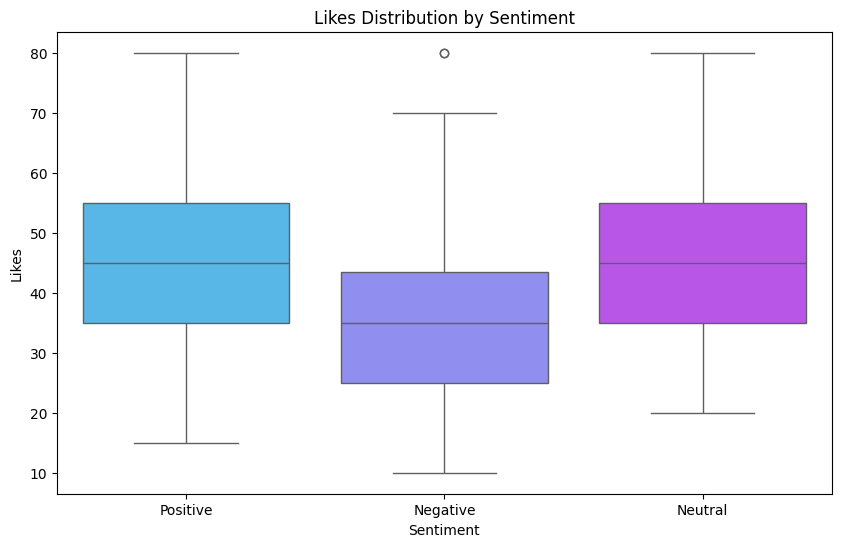

In [26]:
#Engagement Metrics Analysis
#Likes Distribution by Sentiment
plt.figure(figsize=(10,6))
sns.boxplot(data=tweets_df,x='Sentiment', y='Likes',hue='Sentiment',palette='cool')
plt.title('Likes Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Likes')
plt.show()

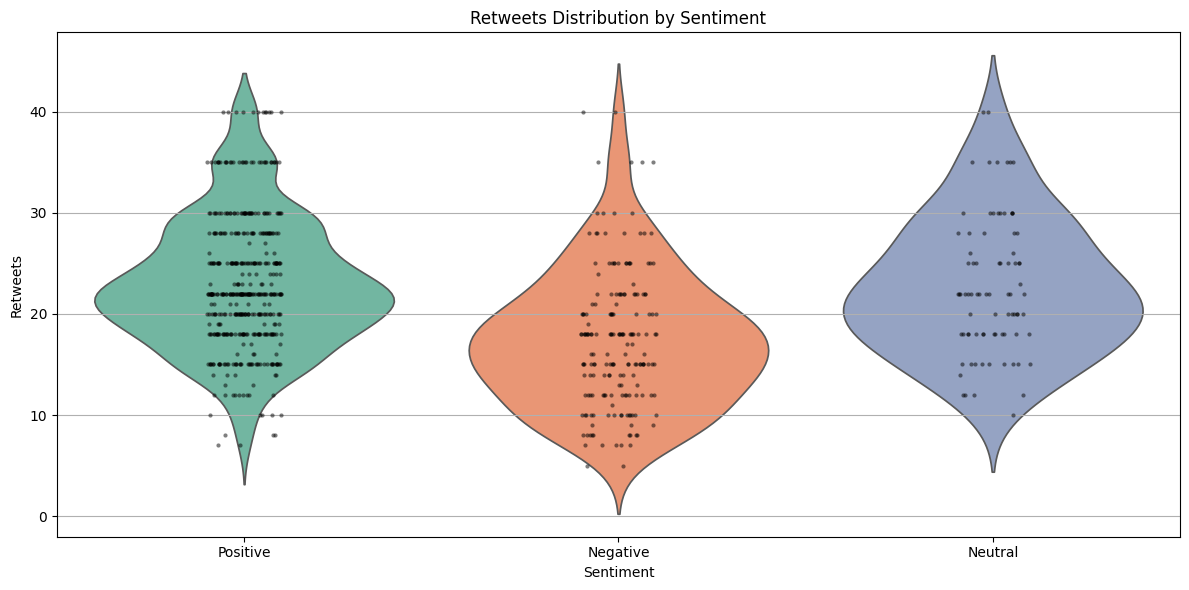

In [30]:
#Retweets Distribution by Sentiment
plt.figure(figsize=(12,6))

#Create violin plot
sns.violinplot(data=tweets_df,x='Sentiment',y='Retweets',hue='Sentiment',palette='Set2',inner=None,legend=False)

#Overlay strip plot with jitter
sns.stripplot(data=tweets_df,x='Sentiment',y='Retweets',color='k',alpha=0.5,size=3,jitter=True)

#Add title and labels
plt.title('Retweets Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Retweets')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

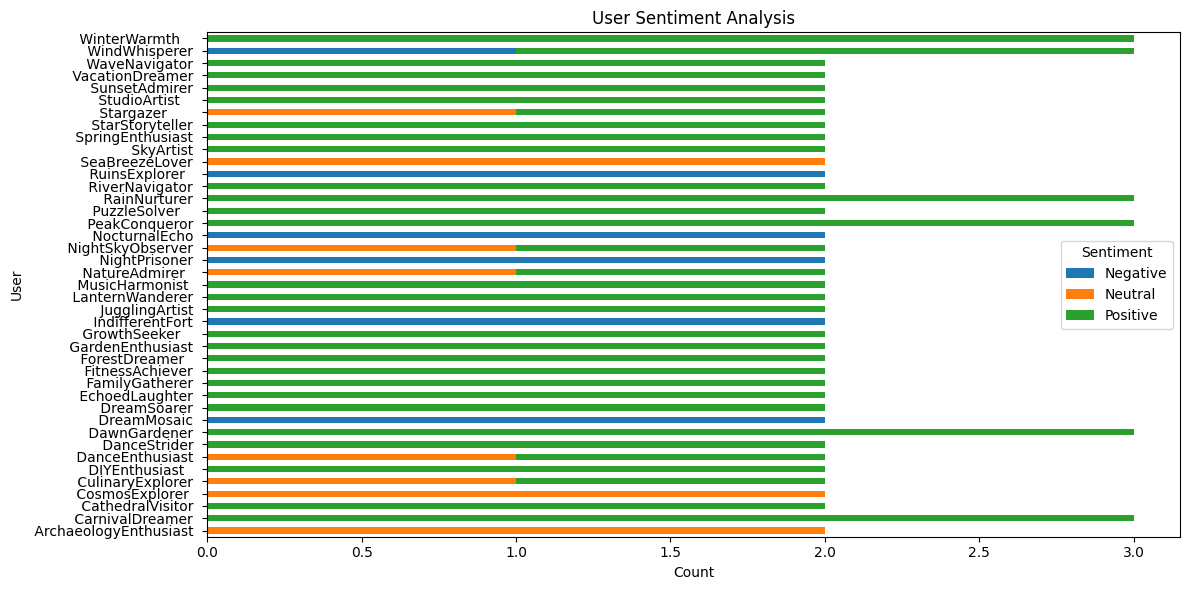

In [42]:
#Group by user & sentiment , then count occurrences
user_sent = tweets_df.groupby('User')['Sentiment'].value_counts().unstack().fillna(0)

#Check if the dataframe is empty after filtering
if user_sent.sum(axis=1).max()>0:
  user_sent=user_sent[user_sent.sum(axis=1)>1]

  #Plot user sentiment analysis
  user_sent.plot(kind='barh',stacked=True,figsize=(12,6))
  plt.title('User Sentiment Analysis')
  plt.xlabel('Count')
  plt.ylabel('User')
  plt.tight_layout()
  plt.show()
else:
  print('No users with more than one sentiment analysis')